# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import time
import os
import re
import warnings
warnings.filterwarnings('ignore')

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#to return an image
with open('image_prediction.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
image_prediction = pd.read_csv('image_prediction.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
twitter_api = []
with open("tweet-json.txt", "r") as file:
    for line in file:
        try:
            tweet = json.loads(line)
            twitter_api.append({'tweet_id': tweet['id'],
                                'retweet_count': tweet['retweet_count'],
                                'favorite_count': tweet['favorite_count'],
                                'retweeted': tweet['retweeted'],
                                'display_text_range': tweet['display_text_range']
                               })
        except:
            print('error')
                
api = pd.DataFrame(twitter_api, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [7]:
#visually assessing the twitter archive data for quality and tidiness issues with jupyter notebook and excel spreedsheet
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


There are a lot of missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp, and some missing data in the expanded_urls columns.

There are retweeted tweets, we only want original ratings that have images, so all retweeted ratings should be removed.

Ratings have inconsistent values.

Unusual names for dogs such as none, a, an, the, are found in the name column.

The dog category has four different columns, doggo, floofer, pupper,puppo, each with a lot of the value NONE. It should be made into one category called dog_stage.

In [8]:
#assessing the twitter archive data using programatic assesment
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are incorrect data types, tweet_id column is supposed to be a str, timestamp column is supposed to be datetime datatype 

In [9]:
# check for duplicate data
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no duplicated data here.

In [10]:
# we will also check for wrong dog names programatically
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Batdog       1
Blipson      1
Mimosa       1
Goliath      1
Jim          1
Name: name, Length: 957, dtype: int64

In [11]:
#checking the value count for rating denominator column
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [12]:
#assessing the image prediction data
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Incorrect datatype for the tweet_id column.

There are inconsistencies in cases(lower case and upper cases) in the p1,p2 and p3 column.

There are 2075 entries of data here while there are 2356 entries of data in the twitter_archive data, which means there are missing images/tweets with no image.

In [14]:
#assessing the twitter api data
api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [15]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Incorrect datatype fot the tweet_id column.

All three tables should be merged.

### Quality issues
1.There are a lot of missing data in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp, and some missing data in the expanded_urls columns.

2.There are retweeted tweets, we only want original ratings that have images, so all retweeted ratings should be removed.

3.Ratings have inconsistent values.

4.There are unusual names for dogs such as none, a, an, the, are found in the name column.

5.The tweet_id column has a wrong datatype across all three tables, it is supposed to be a str.

6.The timestamp column is has a wrong datatype, it is supposed to be datetime datatype.

7.There are inconsistencies in cases(lower case and upper cases) in the p1,p2 and p3 column.

8.There are 2075 entries of data in the image_prediction data while there are 2356 entries of data in the twitter_archive data, which means there are missing images/tweets with no image.


### Tidiness issues
1.The dog category has four different columns, doggo, floofer, pupper,puppo, it should be made into one column titled dog_stage.

2.All three tables should be merged. Having just one tweet_id column after the merger

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
twitter_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
api_clean = api.copy()

In [17]:
#test
twitter_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [18]:
#test
image_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [19]:
#test
api_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Issue #1:
The tweet_id column has a wrong datatype across all three tables, it is supposed to be a str.

#### Define:
We first have to convert the datatype of the tweet_id column in all three tables so that further cleaning, merging and analysis will be easy.

#### Code

In [20]:
#convert the tweet_id column datatype from integer to string
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
api_clean['tweet_id'] = api_clean['tweet_id'].astype(str)

#### Test

In [21]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [23]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #2:
The timestamp column is has a wrong datatype, it is supposed to be datetime datatype

#### Define:
The timestamp column datatype has to be corrected and change to the approriate datatype for accuracy and analysis purposes.

#### Code

In [24]:
#change the timestamp datatype to datetime
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

#### Test

In [25]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3:
The dog category has four different columns, doggo, floofer, pupper,puppo, it should be made into one column titled dog_stage.

#### Define: 
The four different dog stages/categories separated into four columns should be merged/combined into one column for tidiness and easier analysis.

#### Code

In [26]:
columns = twitter_clean.columns.tolist()
twitter_clean = pd.melt(twitter_clean, id_vars = columns[:-4], value_name = 'dog_stage')
twitter_clean.drop(['variable'], axis = 1, inplace = True)
twitter_clean.sort_values(by = 'dog_stage', inplace = True)
twitter_clean.drop_duplicates('tweet_id', keep = 'last', inplace = True)

#### Test

In [27]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64        

In [28]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,825535076884762624,NaN,NaN,2017-01-29 02:44:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,puppo
7465,825120256414846976,NaN,NaN,2017-01-27 23:16:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,puppo
7466,825026590719483904,NaN,NaN,2017-01-27 17:04:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,puppo
7622,803773340896923648,NaN,NaN,2016-11-30 01:31:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,puppo


### Issue #4:
All three tables should be merged. Having just one tweet_id column after the merger.

#### Define
we will be merging the twitter_clean, image_clean and api_clean data to form one table so that cleaning will be easier and accurate and for tidiness.

#### Code

In [29]:
main_data = pd.merge(twitter_clean, image_clean, on = 'tweet_id', how = 'inner')

In [30]:
main_data = pd.merge(main_data, api_clean, on = 'tweet_id', how = 'inner')

In [31]:
main_clean = main_data.copy()

#### Test

In [32]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### Issue #5 and #6:
There are a lot of missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp, and some missing data in the expanded_urls columns.

There are retweeted tweets, we only want original ratings that have images, so all retweeted ratings should be removed.

#### Define:
We will be removing all rows in the retweeted_status_id column firsst and then we will be removing all retweet columns which includes in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp and retweet_count. Because we only want original ratings and we dont want our data frame filled with data columns that will not be used in our analysi because of too many null values.

#### Code:

In [33]:
main_clean = main_clean[main_clean.retweeted_status_id.isnull()]

In [34]:
main_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweet_count', 'expanded_urls'], axis=1, inplace = True)

#### Test:

In [35]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   dog_stage           1994 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

### Issue #7:
Ratings have inconsistent values.

#### Define:
the rating_numerator and rating_denominator have inconsistent values, some denominators above 10 and most of the numerators above 10. I will not be cleaning this because I assume it is part of the uniqueness of the rating system.

### Issue #8:
Unusual names for dogs such as none, a, an, the, are found in the name column.

#### Define:
All entries in the name column that are not names such as none, a, an, the, will be changed to 'no name'.

#### Code

In [36]:
main_clean['name'] = main_clean['name'].replace(['None', 'a', 'an', 'the'], 'no name')

#### Test

In [37]:
main_clean.name.value_counts()

no name    614
Charlie     11
Cooper      10
Lucy        10
Oliver      10
          ... 
Jordy        1
Swagger      1
Brudge       1
Filup        1
Rolf         1
Name: name, Length: 933, dtype: int64

### Issue #9:
There are inconsistencies in cases(lower case and upper cases) in the p1,p2 and p3 column.

#### Define:
 I will be changing the cases in the three columns to lowercase for uniformity and easy analysis of data.

#### Code

In [38]:
main_clean['p1'] = main_clean['p1'].str.lower()
main_clean['p2'] = main_clean['p2'].str.lower()
main_clean['p3'] = main_clean['p3'].str.lower()

#### Test

In [39]:
main_clean.p1.value_counts()

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
                     ... 
tailed_frog             1
conch                   1
china_cabinet           1
shopping_basket         1
sunglasses              1
Name: p1, Length: 374, dtype: int64

In [40]:
main_clean.p2.value_counts()

labrador_retriever          96
golden_retriever            82
cardigan                    73
chihuahua                   43
chesapeake_bay_retriever    40
                            ..
spatula                      1
ashcan                       1
academic_gown                1
sandbar                      1
sulphur_butterfly            1
Name: p2, Length: 400, dtype: int64

In [41]:
main_clean.p3.value_counts()

labrador_retriever    76
chihuahua             57
golden_retriever      46
eskimo_dog            36
kelpie                33
                      ..
padlock                1
cuirass                1
crossword_puzzle       1
conch                  1
mink                   1
Name: p3, Length: 405, dtype: int64

### Issue #10:
There are 2075 entries of data in the image_prediction data while there are 2356 entries of data in the twitter_archive data, which means there are missing images/tweets with no image.

#### Define:
i will be dropping all empty rows in the jpg_url column because it means that there are no images. Then i'll check for duplicates in the column and then drop the rows that do not have dog images.

#### Code

In [42]:
#dropping all nan rows in the jpg_url column
main_clean.dropna(subset=['jpg_url'], inplace=True)

In [43]:
#checking for duplicates
sum(main_clean.jpg_url.duplicated())

0

In [44]:
#removing rows that do not contain dog images
main_clean.drop(main_clean.query('p1_dog and p2_dog == False and p3_dog == False').index, inplace=True)
main_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count
2,667549055577362432,2015-11-20 03:44:31+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,1,10,no name,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,6138
6,667724302356258817,2015-11-20 15:20:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,7,10,no name,None,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False,517
19,667911425562669056,2015-11-21 03:44:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Wow. Armored dog here. Ready for battle. Face ...,5,10,no name,None,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1,frilled_lizard,0.257695,False,ox,0.235160,False,triceratops,0.085317,False,523
24,667766675769573376,2015-11-20 18:09:16+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,9,10,Calvin,None,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False,476
25,667873844930215936,2015-11-21 01:15:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Neat dog. Lots of spikes. Always in push-up po...,10,10,no name,None,https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg,1,common_iguana,0.999647,False,frilled_lizard,0.000181,False,african_chameleon,0.000128,False,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,675113801096802304,2015-12-11 00:44:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zuzu. He just graduated college. Astute p...,10,10,Zuzu,pupper,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False,2120
2031,779377524342161408,2016-09-23 17:50:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,12,10,no name,pupper,https://pbs.twimg.com/ext_tw_video_thumb/77937...,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False,9831
2032,836380477523124226,2017-02-28 01:00:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,12,10,Ava,pupper,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061016,False,grand_piano,0.055086,False,16037
2048,776113305656188928,2016-09-14 17:40:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He's about to get hit with a ...,11,10,Sampson,pupper,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False,13102


#### Test

In [45]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 2 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1951 non-null   object             
 1   timestamp           1951 non-null   datetime64[ns, UTC]
 2   source              1951 non-null   object             
 3   text                1951 non-null   object             
 4   rating_numerator    1951 non-null   int64              
 5   rating_denominator  1951 non-null   int64              
 6   name                1951 non-null   object             
 7   dog_stage           1951 non-null   object             
 8   jpg_url             1951 non-null   object             
 9   img_num             1951 non-null   int64              
 10  p1                  1951 non-null   object             
 11  p1_conf             1951 non-null   float64            
 12  p1_dog              1951 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
main_clean.to_csv('twitter_archive_master.csv', sep='\t', encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
df = pd.read_csv('twitter_archive_master.csv', sep='\t')

In [48]:
df.head(2)

,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count
0,2,667549055577362432,2015-11-20 03:44:31+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,1,10,no name,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,6138
1,3,667546741521195010,2015-11-20 03:35:20+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,9,10,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,...,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False,355


### Question
Which dog stage has the most like/favorite count?

In [49]:
#first we will group the dog_stage data with respect to like count and then save it in a new list create a new series 
df_dog_stage = df.groupby('dog_stage')['favorite_count'].count()
df_dog_stage

dog_stage
None       1653
doggo        62
floofer       8
pupper      205
puppo        23
Name: favorite_count, dtype: int64

### Visualization

For this visualization i will be making use of the series just created above to create a bar chart to analyze the rate of dog stages to like/favorite count.

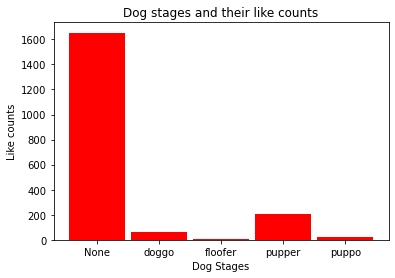

In [50]:
plt.bar(np.arange(5), df_dog_stage, color = 'red', width = 0.9)
plt.xticks(np.arange(5), ('None', 'doggo', 'floofer', 'pupper', 'puppo'))
plt.xlabel('Dog Stages')
plt.ylabel('Like counts')
plt.title('Dog stages and their like counts')
plt.show()

### Insight:
1. Setting aside the 'None' data, the dog stage with the highest like count is pupper.

2. While the dog stage with the lowest like count is floofer.

3. The pupper dog stage has over twice the like counts of the puppo and floofer dog stages.